In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [102]:
# model class innherits from nn.Module
class Model(nn.Module):
    '''input layer has 4 featuresofthe flower -->
    hidden layer 1 -->
    hidden layer 2-->
    output 3 classes of flower
    their we can use the famous iris flower '''

    def __init__(self, in_features=4,h1=8,h2=8,out_features=3) :
        super(). __init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2= nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,out_features)

    def forward(self,x):
        # Rectified Linear Unit it tells if sum of values will greater than 0 so it will be resultant if not then called 0.
        x=f.relu(self.fc1(x))
        x=f.relu(self.fc2(x)) 
        x=f.relu(self.fc3(x))

        return x
     

In [103]:
torch.manual_seed(50)

# create an instance of model
model=Model()

# Train the iris flower

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
# for train the iris datasets
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)
my_df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [106]:
my_df['variety']=my_df['variety'].replace('Setosa',0)
my_df['variety']=my_df['variety'].replace('Versicolor',1)
my_df['variety']=my_df['variety'].replace('Virginica',2)
my_df

C:\Users\prash\AppData\Local\Temp\ipykernel_16400\3516414558.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Virginica',2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [130]:
# Train test and split Set x,y
x=my_df.drop('variety', axis=1)
y=my_df['variety']


In [108]:
# convert these into numpy
x=x.values
y=y.values


Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python

In [109]:
# pip install -U scikit-learn


In [110]:
from sklearn.model_selection import train_test_split


In [111]:
# train test split 'random_state gives the same random number'
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=41)

In [112]:
# convert x labels to float tensors
x_train= torch.FloatTensor(x_train)
x_test= torch.FloatTensor(x_test)

In [113]:
# convert y labels to long tensors
y_train= torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)

In [114]:
# set criteria to measure error, for the prediction
criteria= nn.CrossEntropyLoss()

#choose Adam Optimizers , learning rate
optimizer= torch.optim.Adam(model.parameters(), lr=0.01)

In [115]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)>

In [135]:
# Train our model (epochs)
epochs=100
losses=[]
for i in range(epochs):
    # go forward and get a prediction
    y_pred= model.forward(x_train)

    #loss calc
    loss=criteria(y_pred, y_train)
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if i % 10 ==0:
        print(f'Epoch: {i} and loss is {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()     


Epoch: 0 and loss is 0.7232925295829773
Epoch: 10 and loss is 0.6246357560157776
Epoch: 20 and loss is 0.4786747992038727
Epoch: 30 and loss is 0.4202636778354645
Epoch: 40 and loss is 0.39831027388572693
Epoch: 50 and loss is 0.3886784017086029
Epoch: 60 and loss is 0.3846644163131714
Epoch: 70 and loss is 0.3847338855266571
Epoch: 80 and loss is 0.3811853229999542
Epoch: 90 and loss is 0.3792475759983063


Text(0.5, 0, 'epochs')

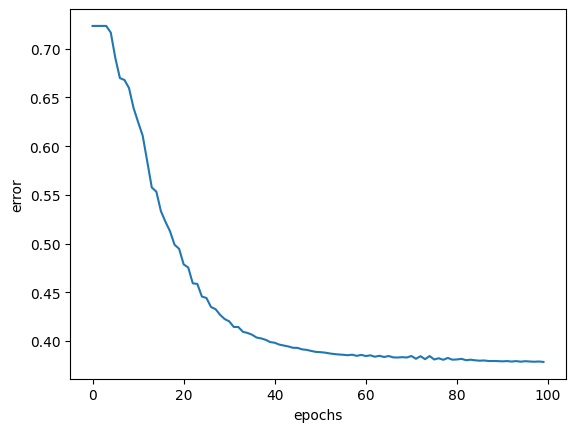

In [136]:
# by using matplotlib we can graph represent
plt.plot(range(epochs), losses)
plt.ylabel("error")
plt.xlabel("epochs")